<a href="https://colab.research.google.com/github/ChoiDae1/Machine-DeepLearing_Study/blob/main/%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C(%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%2C%EB%A6%BF%EC%A7%80%2C%EB%9D%BC%EC%8F%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('http://bit.ly/perch_csv')
perch_full=df.to_numpy()
import numpy as np
perch_weight=[5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896101671037343
0.9790693977615397


0.9903815817570366 0.9827976465386927


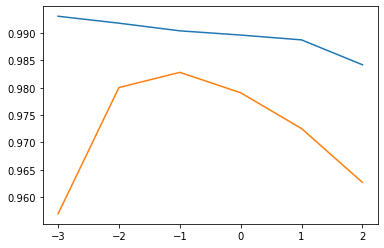

In [ ]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for a in alpha_list:
  ridge=Ridge(alpha=a)
  ridge.fit(train_scaled,train_target)
  test_score.append(ridge.score(test_scaled,test_target))
  train_score.append(ridge.score(train_scaled,train_target))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
print(train_score[2],test_score[2])

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.989789897208096
0.9800593698421883


0.9888067471131867 0.9824470598706695


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

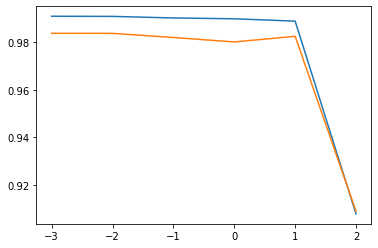

In [ ]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for a in alpha_list:
  lasso=Lasso(alpha=a)
  lasso.fit(train_scaled,train_target)
  test_score.append(lasso.score(test_scaled,test_target))
  train_score.append(lasso.score(train_scaled,train_target))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
print(train_score[4],test_score[4])